In [2]:
import pandas as pd
import torch
import os
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt

result_dir = "H:/JHMDB/models"

# all models

In [15]:
results = {}
for m in tqdm(os.listdir(f"{result_dir}")):

    # print(m)

    max_acc = 0
    max_train_acc = 0

    for e in os.listdir(f"{result_dir}/{m}"):

        if e == 'model': continue

        res = torch.load(f"{result_dir}/{m}/{e}", map_location=torch.device('cpu'))
        acc = accuracy_score(res['val_actual'], res['val_predicted'])
        train_acc = accuracy_score(res['train_actual'], res['train_predicted'])

        if acc > max_acc: max_acc = acc
        if train_acc > max_train_acc: max_train_acc = train_acc

    results[m] = max_acc

    # print(max_acc)
    # print(max_train_acc)

s = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])}
for k in s.keys():
    print(f"{k} - {s[k]}")

100%|██████████| 35/35 [00:36<00:00,  1.05s/it]

m_test - 0
m_5.4.4 - 0.05970149253731343
m_5.4.3 - 0.06716417910447761
m_6.0 - 0.07462686567164178
m_4.7 - 0.09328358208955224
m_5.10 - 0.1044776119402985
m_5.4.2 - 0.1044776119402985
m_5.5 - 0.11567164179104478
m_5.8 - 0.11567164179104478
m_5.6 - 0.12313432835820895
m_4.9.5 - 0.13432835820895522
m_5.7 - 0.13432835820895522
m_4.9.10 - 0.13805970149253732
m_5.3 - 0.13805970149253732
m_4.9.4 - 0.1417910447761194
m_4.10 - 0.14925373134328357
m_5.9 - 0.14925373134328357
m_4.11 - 0.16044776119402984
m_4.9.8 - 0.16044776119402984
m_4.9.9 - 0.16791044776119404
m_4.4 - 0.17164179104477612
m_4.8 - 0.17537313432835822
m_4.9.2 - 0.17537313432835822
m_4.9 - 0.1791044776119403
m_4.9.12 - 0.1828358208955224
m_4.9.6 - 0.1865671641791045
m_5.1 - 0.1865671641791045
m_5.4.1 - 0.19029850746268656
m_4.6 - 0.19402985074626866
m_4.9.11 - 0.19776119402985073
m_5.0 - 0.20149253731343283
m_5.4 - 0.20149253731343283
m_5.2 - 0.20522388059701493
m_4.9.7 - 0.2126865671641791
m_4.9.3 - 0.22014925373134328


# one model

In [33]:
#Change this to the version you want
VERSION = "5.4.1"

model_path = f"{result_dir}/m_{VERSION}"

training_accs = []
testing_accs = []

max_epoch = None

max_testing_acc = 0

for e in tqdm(os.listdir(model_path)):

    if e == 'model' : continue

    res = torch.load(f"{model_path}/{e}", map_location=torch.device('cpu'))

    training_accs.append(accuracy_score(res['train_actual'], res['train_predicted']))
    testing_accs.append(accuracy_score(res['val_actual'], res['val_predicted']))

    if accuracy_score(res['val_actual'], res['val_predicted']) > max_testing_acc:
        max_conf_matrix = confusion_matrix(res['val_actual'], res['val_predicted'])
        max_epoch = e
        max_testing_acc = accuracy_score(res['val_actual'], res['val_predicted'])

100%|██████████| 139/139 [00:01<00:00, 79.28it/s] 


In [34]:
max_epoch

'38'

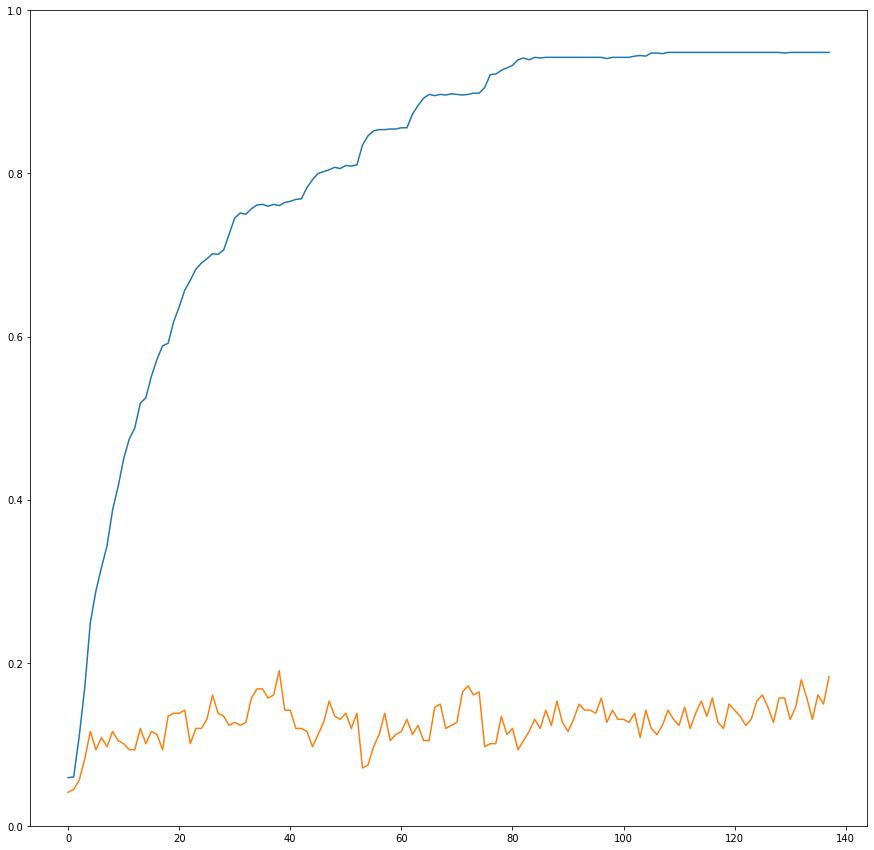

In [37]:
plt.figure(figsize=(15,15))
plt.ylim(0,1)
plt.plot(range(len(training_accs)), training_accs)
plt.plot(range(len(testing_accs)), testing_accs)

In [12]:
max(testing_accs)

0.19029850746268656

In [13]:
max_conf_matrix

array([[ 0,  0,  0,  0,  8,  1,  0,  1,  0,  2,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  7,  0,  0,  3,  1,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0],
       [ 0,  2,  0,  0, 10,  3,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  9,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  6,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  6,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  3,
         0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  5,  0,  0,  2,  0,  1,  2,  0,  0,  0,  0,  0,
         0,  0,  0,